In [62]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
directory = "Results"

# Define the index mapping for filenames
index_mapping = {
    "1_0_29.json": 0,
    "2_30_59.json": 1,
    "3_60_159.json": 2,
    "4_160_259.json": 3,
    "5_260_359.json": 4,
    "6_recording.json": 5,
    "7_460_559.json": 6,
    "8_560_659.json": 7,
    "9_650_759.json": 8,
    "10_760_959.json": 9,
    "11_960_1059.json": 10,
    "12_1060_1159.json": 11,
    "13_1218_1318.json": 12
}

results = []

In [64]:
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Extract relevant metrics
            results.append({
                "index": index_mapping.get(filename, 10), 
                "file": filename,
                "accuracy": data.get("accuracy"),
                "majority_vote_accuracy": data.get("majority_vote_accuracy")
            })

In [65]:
metrics_df = pd.DataFrame(results)
metrics_df.sort_values(by="index", inplace=True)
metrics_df.to_csv("indexed_discriminator_metrics.csv", index=False)  

print(metrics_df)

    index               file  accuracy  majority_vote_accuracy
8       0        1_0_29.json  0.586207                0.655172
0       1       2_30_59.json  0.700000                0.666667
5       2      3_60_159.json  0.660000                0.590000
6       3     4_160_259.json  0.670000                0.670000
2       4     5_260_359.json  0.600000                0.620000
3       5   6_recording.json  0.690000                0.630000
9       6     7_460_559.json  0.690000                0.630000
1       7     8_560_659.json  0.690000                0.680000
10      8     9_650_759.json  0.690000                0.670000
7       9    10_760_959.json  0.550000                0.580000
11     10    11_960-159.json  0.650000                0.660000
4      11  12_1060_1159.json  0.670000                0.620000
12     12  13_1218_1318.json  0.722772                0.683168


In [66]:
# calculate the average accuracies
average_accuracy = metrics_df["accuracy"].mean()
average_majority_vote_accuracy = metrics_df["majority_vote_accuracy"].mean()

'''
accuracy_sum = metrics_df["accuracy"].sum()
accuracy_count = len(metrics_df["accuracy"])
average_accuracy = accuracy_sum / accuracy_count

majority_vote_acc_sum = metrics_df["majority_vote_accuracy"].sum()
majority_vote_acc_count = len(metrics_df["majority_vote_accuracy"])
average_majority_vote_accuracy = majority_vote_acc_sum / majority_vote_acc_count
'''

print(f"Average accuracy: {average_accuracy}")
print(f"Average majority vote accuracy: {average_majority_vote_accuracy}")

Average accuracy: 0.6591522441368804
Average majority vote accuracy: 0.6426928767147272


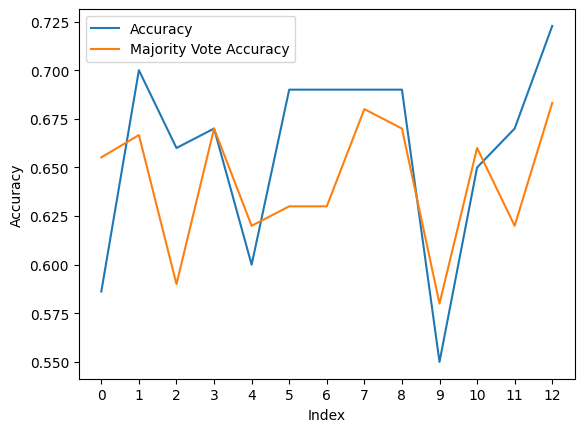

In [67]:
plt.plot(metrics_df["index"], metrics_df["accuracy"], label="Accuracy")
plt.plot(metrics_df["index"], metrics_df["majority_vote_accuracy"], label="Majority Vote Accuracy")
plt.xlabel("Index")
plt.ylabel("Accuracy")
plt.xticks(metrics_df["index"])  # Set x-ticks to every index
plt.legend()
plt.show()

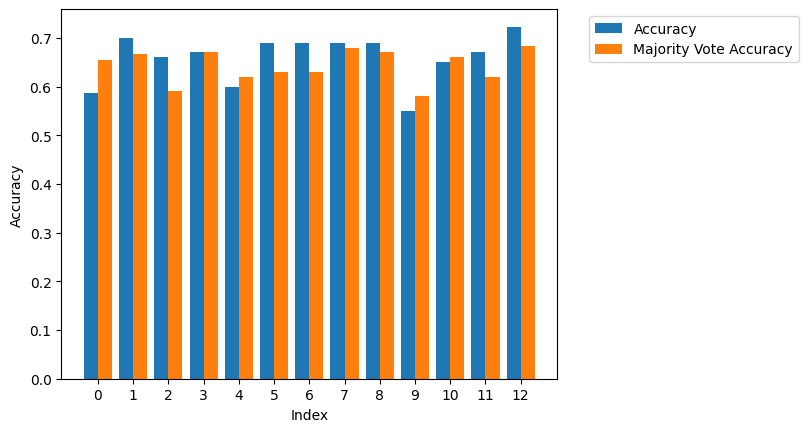

In [68]:
plt.bar(metrics_df["index"] - 0.2, metrics_df["accuracy"], width=0.4, label="Accuracy")
plt.bar(metrics_df["index"] + 0.2, metrics_df["majority_vote_accuracy"], width=0.4, label="Majority Vote Accuracy")
plt.xlabel("Index")
plt.ylabel("Accuracy")
plt.xticks(metrics_df["index"])  # Set x-ticks to every index
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()